In [5]:
import tweepy
from ibm_watson import PersonalityInsightsV3
import json
import pandas as pd
import time

In [230]:
# Get tweets and favorites

TWITTER_CONSUMER_KEY="q4qw7k6rY2mPxRUDEU4kPlNHn"
TWITTER_CONSUMER_SECRET="0GskTiGx3H6cdbjyg8BNKo86CLlTegEggLquHJrFVs7Yrlk98i"
TWITTER_ACCESS_TOKEN="1082776925767122944-Z4LXpd6qSUZwDzGXcxVpK0fKzWViuX"
TWITTER_ACCESS_TOKEN_SECRET="M2gYYsh4Ih7u9mDvWJWvNGuRH2qCV4jwvor2E55PtJqYr"
pi_url = 'https://gateway.watsonplatform.net/personality-insights/api'
pi_username = 'apikey'
pi_password = 'HJXndpm12XK3u2UOzNVHi7A8HmrgICguEARE39nHWve8'

TWITTER_AUTH = tweepy.OAuthHandler(TWITTER_CONSUMER_KEY,TWITTER_CONSUMER_SECRET)
TWITTER_AUTH.set_access_token(TWITTER_ACCESS_TOKEN,TWITTER_ACCESS_TOKEN_SECRET)
TWITTER = tweepy.API(TWITTER_AUTH)

twitter_user = TWITTER.user_timeline(screen_name='austen',
                                     count=30,
                                     tweet_mode='extended',
                                     max_id=twitter_user.max_id)

favorites = TWITTER.favorites('austen',count=30,
                              max_id=favorites.max_id)

In [231]:
# PI analysis

# t = []
# for i in twitter_user: t.append(i.created_at)

def convert_status_to_pi_content_item(t,f):
            return {
                'content': t.full_text + f.text,
                'contenttype': 'text/plain',
                'created': int(time.mktime(t.created_at.timetuple())),
                'id': str(t.id),
                'language': t.lang
            }

pi_content_items_array = list(map(convert_status_to_pi_content_item, twitter_user,
                                  favorites))

pi_content_items = {'contentItems': pi_content_items_array}

data = json.dumps(pi_content_items, indent=2)

personality_insights = PersonalityInsightsV3(
    version='2017-10-13',
    url=pi_url,
    iam_apikey= pi_password)

profile = personality_insights.profile(
          data,
          accept='application/json',
          content_type='application/json',
          consumption_preferences=True,
          raw_scores=True).get_result()

profile

{'word_count': 879,
 'processed_language': 'en',
 'personality': [{'trait_id': 'big5_openness',
   'name': 'Openness',
   'category': 'personality',
   'percentile': 0.641128765520318,
   'raw_score': 0.7601925881296464,
   'significant': True,
   'children': [{'trait_id': 'facet_adventurousness',
     'name': 'Adventurousness',
     'category': 'personality',
     'percentile': 0.8748702056311369,
     'raw_score': 0.5457086771424101,
     'significant': True},
    {'trait_id': 'facet_artistic_interests',
     'name': 'Artistic interests',
     'category': 'personality',
     'percentile': 0.6482328428881295,
     'raw_score': 0.6845896658047953,
     'significant': True},
    {'trait_id': 'facet_emotionality',
     'name': 'Emotionality',
     'category': 'personality',
     'percentile': 0.6104802183530378,
     'raw_score': 0.6596336028830371,
     'significant': True},
    {'trait_id': 'facet_imagination',
     'name': 'Imagination',
     'category': 'personality',
     'percentil

In [232]:
twitter_user.max_id

1121157824204042240

In [233]:
tt = [t.created_at for t in twitter_user]
ti = [t.created_at for t in favorites]
id = [i.id for i in twitter_user]

In [234]:
len(tt), len(ti), len(id)

(30, 30, 30)

In [235]:
# Get analyses for different time intervals and append them to a db
# this will most likely involve since_id

tt[-5:]

[datetime.datetime(2019, 4, 25, 0, 57, 21),
 datetime.datetime(2019, 4, 24, 22, 7, 25),
 datetime.datetime(2019, 4, 24, 21, 10, 53),
 datetime.datetime(2019, 4, 24, 21, 6, 47),
 datetime.datetime(2019, 4, 24, 21, 3, 50)]

In [236]:
p = pd.DataFrame(profile['personality'], columns=['category','name','raw_score'])
n = pd.DataFrame(profile['needs'], columns=['category','name','raw_score'])
v = pd.DataFrame(profile['values'], columns=['category','name','raw_score'])
# df = pd.concat([p,n,v],axis=0)
# df['time'] = twitter_user.max_id
df1 = pd.concat([p,n,v],axis=0)
df1['time'] = twitter_user.max_id
df = df.append(df1)

df.shape

(308, 4)

In [237]:
twitter_user.max_id

1121157824204042240

In [238]:
df.shape

(308, 4)

In [350]:
df

,category,name,raw_score,time
0,personality,Openness,0.766004,1130352987082117119
1,personality,Conscientiousness,0.623164,1130352987082117119
2,personality,Extraversion,0.504791,1130352987082117119
3,personality,Agreeableness,0.691644,1130352987082117119
4,personality,Emotional range,0.462775,1130352987082117119
0,needs,Challenge,0.758457,1130352987082117119
1,needs,Closeness,0.738633,1130352987082117119
2,needs,Curiosity,0.820622,1130352987082117119
3,needs,Excitement,0.617777,1130352987082117119
4,needs,Harmony,0.772047,1130352987082117119


In [247]:
df

,category,name,raw_score,time
0,personality,Openness,0.766004,1130352987082117119
1,personality,Conscientiousness,0.623164,1130352987082117119
2,personality,Extraversion,0.504791,1130352987082117119
3,personality,Agreeableness,0.691644,1130352987082117119
4,personality,Emotional range,0.462775,1130352987082117119
0,needs,Challenge,0.758457,1130352987082117119
1,needs,Closeness,0.738633,1130352987082117119
2,needs,Curiosity,0.820622,1130352987082117119
3,needs,Excitement,0.617777,1130352987082117119
4,needs,Harmony,0.772047,1130352987082117119


In [250]:
df.time.nunique()

14

In [364]:
gr = df.groupby(['time','category']).mean().unstack()
gr.columns = gr.columns.droplevel()
gr

category,needs,personality,values
time,,,
1121157824204042240,0.731731,0.609514,0.726388
1121571396625133567,0.714995,0.606459,0.715757
1121945823518941183,0.702164,0.606128,0.689289
1122715024303091713,0.725931,0.610440,0.718224
1123012734361059328,0.717461,0.598233,0.727263
1123427504826605567,0.709593,0.633440,0.714178
1124062010927460370,0.715081,0.622773,0.715351
1127315738358759423,0.697492,0.601927,0.703513
1127632473230196736,0.690027,0.621326,0.690548


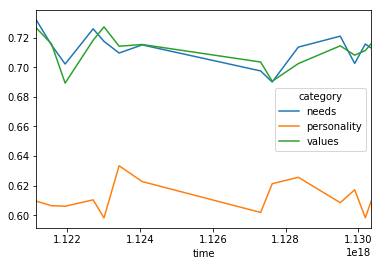

In [372]:
gr.plot()

In [349]:
gr.columns

MultiIndex(levels=[['raw_score'], ['needs', 'personality', 'values']],
           codes=[[0, 0, 0], [0, 1, 2]],
           names=[None, 'category'])

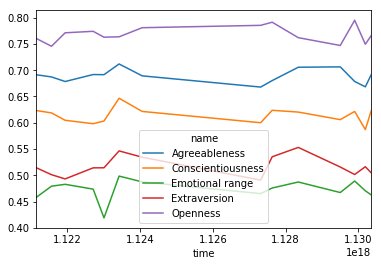

In [370]:
df_p = df[df['category'] == 'personality']
df_p = df_p.groupby(['time','name']).mean().unstack()
df_p.columns = df_p.columns.droplevel()
df_p.plot()

In [371]:
# df.pivot(index='time',values='raw_score',columns='name').plot(figsize=(6,30), subplots=True);